In [1]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector, plot_histogram
from qiskit.compiler import transpile, assemble

from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy

import matplotlib 
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


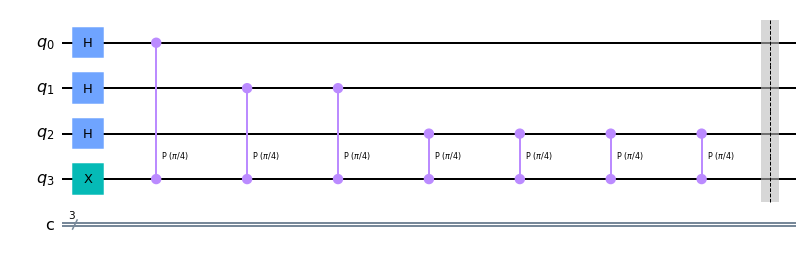

In [2]:
qc = QuantumCircuit(4,3)
qc.x(3)
qc.h(range(3))

reps = 1
for count in range(3):
    for i in range (reps):
        qc.cp(pi/4, count, 3)
    reps *= 2
qc.barrier()
qc.draw('mpl')

In [3]:
def inv_qft(qc, n):
    for qubit in range (n//2):
        qc.swap(qubit, n-qubit-1)
        
    for j in range(n):
        for m in range(j):
            qc.cp(-pi/(2*(j-m)), m, j)
        qc.h(j)

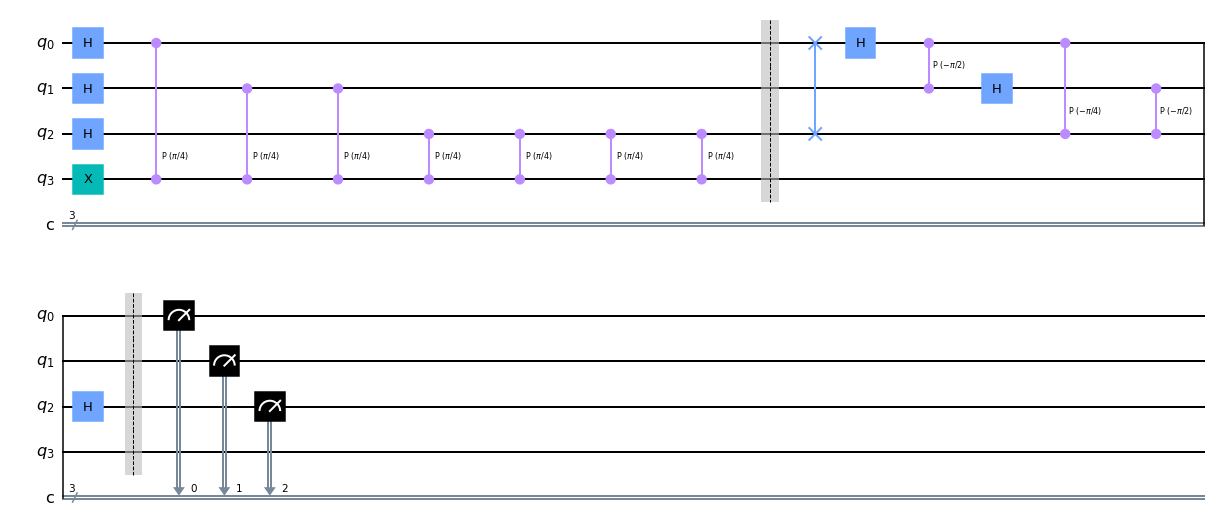

In [4]:
inv_qft(qc, 3)
qc.barrier()
qc.measure(range(3), range(3))
qc.draw('mpl')

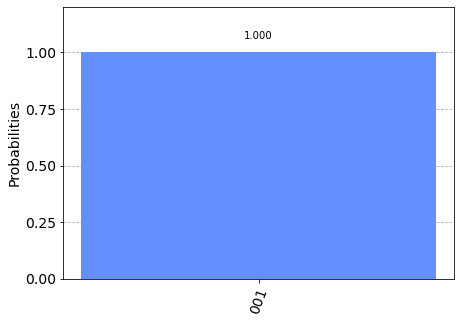

In [5]:
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1
qobj = assemble(qc, qasm_sim)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [6]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 4 and 
                                       not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_lima


In [7]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_circuit = transpile(qc, backend)
qobj = assemble(transpiled_circuit, shots=shots)
job = backend.run(qobj)

job_monitor(job, interval=2)

<ipython-input-7-5f5549b62ed0>:7: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


Job Status: job has successfully run


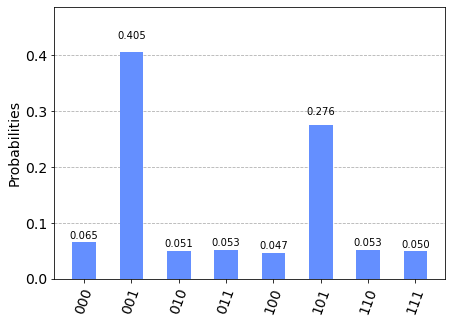

In [8]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)